# Profiling skforecast

## Libraries and data

In [76]:
# Libraries
# ==============================================================================
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

%load_ext pyinstrument

The pyinstrument extension is already loaded. To reload it, use:
  %reload_ext pyinstrument


In [55]:
# Data
# ==============================================================================
n = 10_000
data = pd.Series(data = np.random.normal(size=n))

## Profiling forecaster fit

In order to exclude the training process of the regressor, a summy regressor class is created.m

In [56]:

class DummyRegressor(LinearRegression):
    '''
    '''
    
    def fit(self, X, y):
        pass

    def predict(self, y):
        predictions = np.ones(shape = len(y))
        return predictions
        

In [57]:
%%pyinstrument

forecaster = ForecasterAutoreg(
                    regressor = DummyRegressor(),
                    lags      = 24
             )

forecaster.fit(y=data)

_     ._   __/__   _ _  _  _ _/_   Recorded: 19:51:49  Samples:  69
 /_//_/// /_\ / //_// / //_'/ //     Duration: 0.080     CPU time: 0.071
/   _/                      v4.3.0

Program: /home/ximo/anaconda3/envs/skforecast/lib/python3.9/site-packages/ipykernel_launcher.py --ip=127.0.0.1 --stdin=9003 --control=9001 --hb=9000 --Session.signature_scheme="hmac-sha256" --Session.key=b"48748761-49df-471c-a734-99348e1ae7bb" --shell=9002 --transport="tcp" --iopub=9004 --f=/home/ximo/.local/share/jupyter/runtime/kernel-v2-24678HMxKTseS2m0w.json

0.079 <module>  ../../../../../../tmp/ipykernel_26164/1416878990.py:2
`- 0.079 fit  skforecast/ForecasterAutoreg/ForecasterAutoreg.py:384
      [17 frames hidden]  skforecast, <built-in>, numpy, <__arr...
         0.078 _create_lags  skforecast/ForecasterAutoreg/ForecasterAutoreg.py:245
         |- 0.048 [self]  
         |- 0.028 arange  <built-in>:0

In [58]:
%%pyinstrument

forecaster = ForecasterAutoreg(
                    regressor = LinearRegression(),
                    lags      = 24
             )

forecaster.fit(y=data)

_     ._   __/__   _ _  _  _ _/_   Recorded: 19:51:50  Samples:  44
 /_//_/// /_\ / //_// / //_'/ //     Duration: 0.057     CPU time: 0.147
/   _/                      v4.3.0

Program: /home/ximo/anaconda3/envs/skforecast/lib/python3.9/site-packages/ipykernel_launcher.py --ip=127.0.0.1 --stdin=9003 --control=9001 --hb=9000 --Session.signature_scheme="hmac-sha256" --Session.key=b"48748761-49df-471c-a734-99348e1ae7bb" --shell=9002 --transport="tcp" --iopub=9004 --f=/home/ximo/.local/share/jupyter/runtime/kernel-v2-24678HMxKTseS2m0w.json

0.056 <module>  ../../../../../../tmp/ipykernel_26164/1959294967.py:2
`- 0.056 fit  skforecast/ForecasterAutoreg/ForecasterAutoreg.py:384
      [81 frames hidden]  skforecast, <built-in>, pandas, sklea...
         0.030 _create_lags  skforecast/ForecasterAutoreg/ForecasterAutoreg.py:245
         |- 0.025 [self]

In [59]:
%%pyinstrument

forecaster = ForecasterAutoreg(
                    regressor = RandomForestRegressor(),
                    lags      = 24
             )

forecaster.fit(y=data)

_     ._   __/__   _ _  _  _ _/_   Recorded: 19:51:51  Samples:  451
 /_//_/// /_\ / //_// / //_'/ //     Duration: 26.439    CPU time: 26.436
/   _/                      v4.3.0

Program: /home/ximo/anaconda3/envs/skforecast/lib/python3.9/site-packages/ipykernel_launcher.py --ip=127.0.0.1 --stdin=9003 --control=9001 --hb=9000 --Session.signature_scheme="hmac-sha256" --Session.key=b"48748761-49df-471c-a734-99348e1ae7bb" --shell=9002 --transport="tcp" --iopub=9004 --f=/home/ximo/.local/share/jupyter/runtime/kernel-v2-24678HMxKTseS2m0w.json

26.438 <module>  ../../../../../../tmp/ipykernel_26164/444917129.py:2
`- 26.438 fit  skforecast/ForecasterAutoreg/ForecasterAutoreg.py:384
      [279 frames hidden]  skforecast, sklearn, joblib, <built-i...
         25.910 DepthFirstTreeBuilder.build  <built-in>:0

## Profiling predict

In [61]:
forecaster = ForecasterAutoreg(
                    regressor = DummyRegressor(),
                    lags      = 24
             )

forecaster.fit(y=data)

In [63]:
%%pyinstrument

_ = forecaster.predict(steps=1000)

_     ._   __/__   _ _  _  _ _/_   Recorded: 19:54:50  Samples:  39
 /_//_/// /_\ / //_// / //_'/ //     Duration: 0.041     CPU time: 0.051
/   _/                      v4.3.0

Program: /home/ximo/anaconda3/envs/skforecast/lib/python3.9/site-packages/ipykernel_launcher.py --ip=127.0.0.1 --stdin=9003 --control=9001 --hb=9000 --Session.signature_scheme="hmac-sha256" --Session.key=b"48748761-49df-471c-a734-99348e1ae7bb" --shell=9002 --transport="tcp" --iopub=9004 --f=/home/ximo/.local/share/jupyter/runtime/kernel-v2-24678HMxKTseS2m0w.json

0.040 <module>  ../../../../../../tmp/ipykernel_26164/3639615597.py:2
`- 0.040 predict  skforecast/ForecasterAutoreg/ForecasterAutoreg.py:515
      [30 frames hidden]  skforecast, <__array_function__ inter...
         0.040 _recursive_predict  skforecast/ForecasterAutoreg/ForecasterAutoreg.py:465
         |  0.011 implement_array_function  <built-in>:0
         |- 0.008 [self]  
         |- 0.008 predict  ../../../../../../tmp/ipykernel_26164/3585227619.py:8
         |  |- 0.006 ones  numpy/core/numeric.py:149
         |  |     [7 frames hidden]  numpy, <__array_function__ internals>...
         |  `- 0.002 [self]

In [64]:
forecaster = ForecasterAutoreg(
                    regressor = LinearRegression(),
                    lags      = 24
             )

forecaster.fit(y=data)

In [65]:
%%pyinstrument

_ = forecaster.predict(steps=1000)

_     ._   __/__   _ _  _  _ _/_   Recorded: 19:55:47  Samples:  103
 /_//_/// /_\ / //_// / //_'/ //     Duration: 0.103     CPU time: 0.115
/   _/                      v4.3.0

Program: /home/ximo/anaconda3/envs/skforecast/lib/python3.9/site-packages/ipykernel_launcher.py --ip=127.0.0.1 --stdin=9003 --control=9001 --hb=9000 --Session.signature_scheme="hmac-sha256" --Session.key=b"48748761-49df-471c-a734-99348e1ae7bb" --shell=9002 --transport="tcp" --iopub=9004 --f=/home/ximo/.local/share/jupyter/runtime/kernel-v2-24678HMxKTseS2m0w.json

0.103 <module>  ../../../../../../tmp/ipykernel_26164/3639615597.py:2
|- 0.102 predict  skforecast/ForecasterAutoreg/ForecasterAutoreg.py:515
|     [93 frames hidden]  skforecast, sklearn, <__array_functio...
`- 0.001 stop  pyinstrument/profiler.py:136
      [3 frames hidden]  pyinstrument

## Profiling create train matrix

In [89]:
np.geomspace(1000, 100000, 3, dtype=int)

array([  1000,  10000, 100000])

In [91]:
from unittest import result


series_length = np.geomspace(1000, 1000000, num=3, dtype=int)
n_lags = [5, 10, 50, 100, 200]
results = {}



for lags in n_lags:
    execution_time = []
    forecaster = ForecasterAutoreg(
                    regressor = DummyRegressor(),
                    lags      = lags
                 )

    for n in series_length:
        y = pd.Series(data = np.random.normal(size=n))
        tic = time.perf_counter()
        _ = forecaster.create_train_X_y(y=y)
        toc = time.perf_counter()
        execution_time.append(toc-tic)

    results[lags] = execution_time

results = pd.DataFrame(
            data =  results,
            index = series_length
        )

results

,5,10,50,100,200
1000,0.022918,0.004759,0.004595,0.020419,0.035669
31622,0.090853,0.092325,0.102094,0.127829,0.153748
1000000,2.899435,3.023946,3.976934,4.850508,7.468689


<AxesSubplot:>

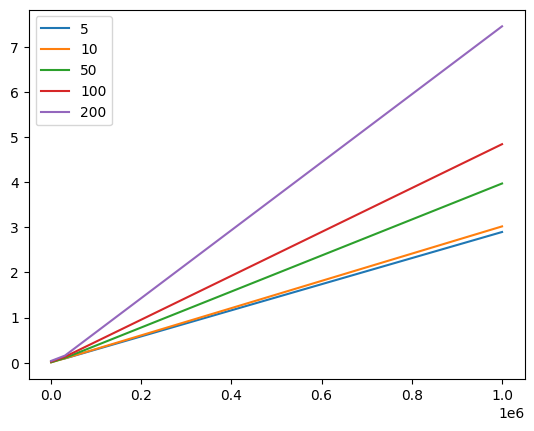

In [92]:
results.plot()